In [4]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

/Users/apple/python/SkillFactory/Ml_learning/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = x_train/ 255
x_test = x_test/ 255

In [7]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

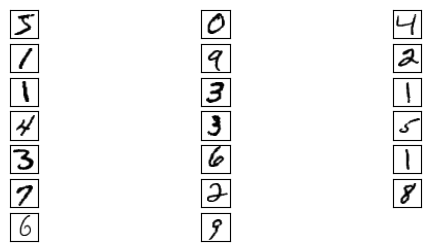

In [8]:
plt.figure(figsize=(7,3))
for i in range(20):
    plt.subplot (7,3, i+1) 
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()


########################################################################################

In [9]:
########################################Сама Нейронка############################################


model = keras.Sequential([
    Flatten(input_shape= (28,28,1)), 
    Dense(128, activation='relu'), 
    Dense(10, activation = 'softmax')
])
print(model.summary())

/Users/apple/python/SkillFactory/Ml_learning/.venv/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])


In [11]:
model.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 627us/step - accuracy: 0.8598 - loss: 0.4899 - val_accuracy: 0.9525 - val_loss: 0.1624
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9583 - loss: 0.1413 - val_accuracy: 0.9646 - val_loss: 0.1193
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9726 - loss: 0.0935 - val_accuracy: 0.9724 - val_loss: 0.0970
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9809 - loss: 0.0653 - val_accuracy: 0.9736 - val_loss: 0.0905
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.9853 - loss: 0.0499 - val_accuracy: 0.9757 - val_loss: 0.0836


In [12]:
model.evaluate(x_test, y_test_cat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.9705 - loss: 0.0992


[0.08021848648786545, 0.975600004196167]

In [13]:
model.save('model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[4.7526560e-09 3.0980273e-12 2.8324044e-08 2.9835383e-06 2.9646742e-04
  2.4995261e-08 4.0676167e-11 1.0065142e-03 1.3120516e-04 9.9856287e-01]]
Распознанная цифра: 9


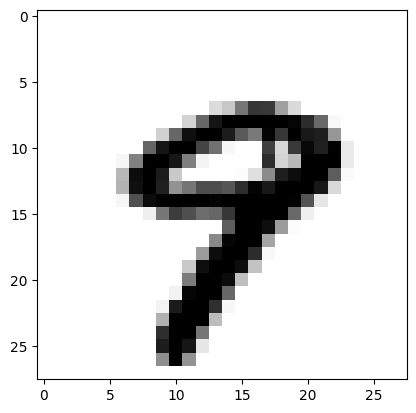

In [14]:
n = 9

x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Распознанная цифра: {np. argmax(res)}")
plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

In [15]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)
print(pred.shape)
print(pred[:20])

print(y_test[:20])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 295us/step
(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [16]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]
print(x_false.shape)

[ True  True  True  True  True  True  True  True  True  True]
(244, 28, 28)


Значение сети: 0


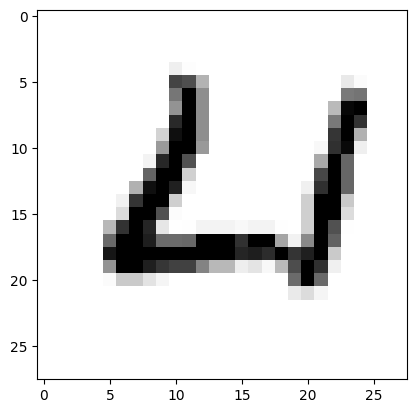

Значение сети: 2


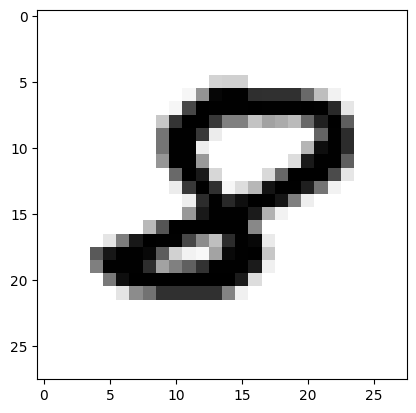

Значение сети: 9


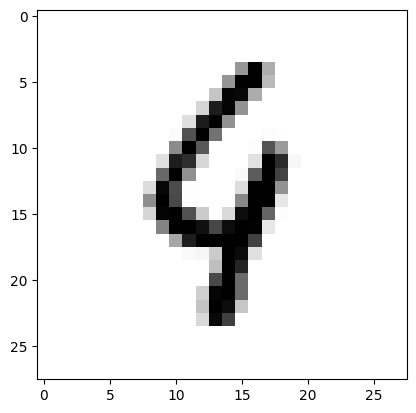

Значение сети: 8


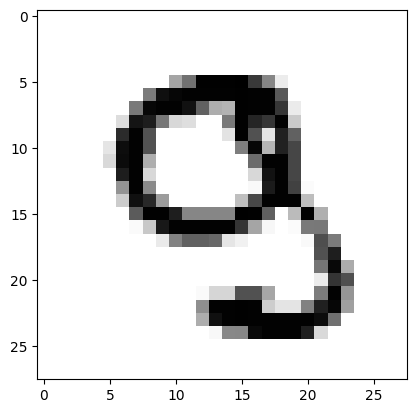

Значение сети: 2


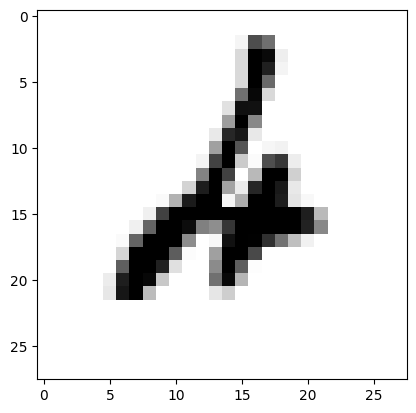

Значение сети: 7


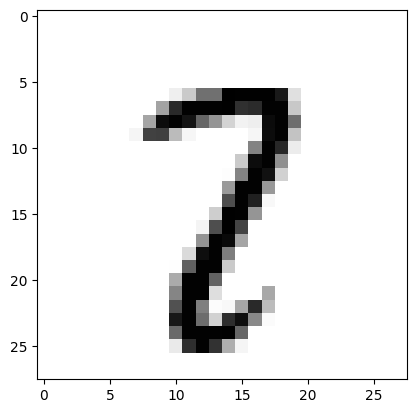

In [19]:
for i in range(6):
    print("Значение сети: "+str(p_false[i]))
    plt.imshow(x_false[i], cmap=plt.cm.binary)
    plt.show()

Надеюсь все получится

In [18]:
from tensorflow.keras.models import load_model

# Загрузка ранее сохранённой модели
model = load_model('model.h5')
